In [21]:
# import libraries 
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, recall_score, confusion_matrix



In [71]:
# import dataset 
diabetes= pd.read_csv("C:/Users/kezen/OneDrive/Documents/Microsoft/data/diabetes.csv", delimiter=",", header="infer")

# Exploratory data analysis 
#print(diabetes.describe())

# check for null values 
diabetes.isna().sum()
def age_function(x):
    if x < 18:
        return "Child"
    elif x >=18 and x <= 65:
        return "Adult"
    else: 
        return "Elderly"
diabetes["AgeGroup"] = diabetes.Age.apply(age_function)
print(diabetes.groupby("AgeGroup").Diabetic.count())
px.histogram(diabetes, "AgeGroup", color="Diabetic", barmode= "group")

AgeGroup
Adult      14742
Elderly      258
Name: Diabetic, dtype: int64


In [72]:
def agegroup_to_numeric(x):
    
    if x == "Adult":
        return 0
    else:
        return 1

diabetes["AgeGroup_num"] = diabetes.AgeGroup.apply(agegroup_to_numeric)
print(diabetes.groupby("AgeGroup_num").Diabetic.count())
print(diabetes.dtypes)
px.histogram(diabetes, "AgeGroup_num", color="Diabetic", barmode= "group")


AgeGroup_num
0    14742
1      258
Name: Diabetic, dtype: int64
PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
AgeGroup                   object
AgeGroup_num                int64
dtype: object


In [76]:
# visualisation
px.histogram(diabetes,  "BMI",  color="Diabetic") 
def bmi_function(x):
    if x < 18.5:
        return "Underweight"
    elif x >= 18.5 and x < 25:
        return "Healthy"
    elif x >= 25 and x < 30:
        return "Overweight"
    else:
        return "Obese"
diabetes["BmiRange"] = diabetes.BMI.apply(bmi_function)
diabetes.groupby(["BmiRange", "Diabetic"])["Diabetic"].count()
px.histogram(diabetes, "BmiRange", color="Diabetic", barmode="group") # seems that overweight and obese individuals are more likely to have diabetes 



In [77]:
def bmi_to_numeric(x):
    if x == "Healthy":
        return 0
    elif x == "Underweight":
        return 1
    elif x == "Overweight":
        return 2
    else:
        return 3


diabetes["BmiRange_num"] = diabetes.BmiRange.apply(bmi_to_numeric)
diabetes.BmiRange_num = diabetes.BmiRange_num.astype("int64")
print(diabetes.groupby("BmiRange_num").Diabetic.count())
print(diabetes.dtypes)
px.histogram(diabetes, "BmiRange_num", color="Diabetic", barmode= "group")


BmiRange_num
0    5129
1     287
2    1336
3    8248
Name: Diabetic, dtype: int64
PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
AgeGroup                   object
AgeGroup_num                int64
BmiRange                   object
BmiRange_num                int64
dtype: object


In [117]:

## create features and response dataset
features=["Pregnancies", "PlasmaGlucose","DiastolicBloodPressure","TricepsThickness",
          "SerumInsulin", "BMI","DiabetesPedigree", "Age", "AgeGroup", "BmiRange"]
diabetic = ["Diabetic"]

x = diabetes.drop(columns=["AgeGroup", "BmiRange", "PatientID", "Diabetic"])

y = np.ravel(diabetes.Diabetic)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=0)




In [118]:
from sklearn.preprocessing import StandardScaler
#scale the numerical features

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=100, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None).fit(x_train, y_train)
# get feature importance
model.feature_importances_

array([0.34511068, 0.05221575, 0.02660556, 0.0464133 , 0.05658706,
       0.05717453, 0.02074607, 0.16221528, 0.04272097, 0.19021086],
      dtype=float32)

In [112]:
for index, name in enumerate(x):
    print(f"Features {index}: {name}")

Features 0: Pregnancies
Features 1: PlasmaGlucose
Features 2: DiastolicBloodPressure
Features 3: TricepsThickness
Features 4: SerumInsulin
Features 5: BMI
Features 6: DiabetesPedigree
Features 7: Age


In [119]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state= 100).fit(x_train, y_train)
# make predictions on the test data set 
predictions = model.predict(x_test)
# create dataframe of predictions vs actual values 
df = pd.DataFrame({
    "Actual_values": y_test,
    "Predicted_values": predictions
})
df.sample(10)


C:\Users\kezen\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[22:19:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Actual_values,Predicted_values
2584,0,0
2673,1,1
415,0,0
4393,1,1
2851,1,1
3576,0,0
2352,1,1
414,1,1
3423,0,0
2180,1,1


In [120]:
# evaluate model performance 
accuracy = np.round(accuracy_score(y_test, predictions), 2)
recall = np.round(recall_score(y_test, predictions), 2)
precision = np.round(precision_score(y_test, predictions), 2)
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predictions)
print("Confusion Matrix:", "\n", cm)



Accuracy: 0.95
Recall: 0.92
Precision: 0.93
Confusion Matrix: 
 [[2879  107]
 [ 114 1400]]


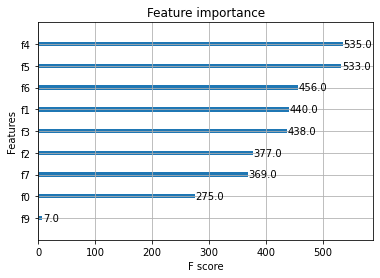

[0.51037997 0.06561954 0.03150045 0.04344368 0.06436234 0.11039008
 0.02470069 0.13148478 0.         0.01811831]
Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'AgeGroup_num', 'BmiRange_num'],
      dtype='object')


In [121]:
# get feature importance 
from xgboost import plot_importance
plot_importance(model)
plt.show()
print(model.feature_importances_)
print(x.columns)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# preprocess the numeric features: scale them
numeric_features= [0,1,2,3,4,5]
numeric_transformers= Pipeline(steps=[
  ("scaler", StandardScaler())])
#preprocess categorical features 
cat_features= [6, 7]
cat_transformers= Pipeline(steps = [
  ("onehot", LabelEncoder())
])

# combine the two preprocessed dat5a 
preprocess = ColumnTransformer(transformers = [
  ("numeric", numeric_transformers, numeric_features),("categoric", cat_transformers, cat_features)
])

# combine the preprocessed and trainingpipleines 
pipeline= Pipeline(steps=[
  ("processor", preprocess),
  ("regressor", GradientBoostingClassifier(random_state = 0))
])


#Fit the pipeline to the training datasets
model = pipeline.fit(x_train, y_train)
print(f"\n {model}")

#make predictions on the test data set
predictions = model.predict(x_test)
model = GradientBoostingClassifier(random_state=0).fit(x_train, y_train)
model
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

TypeError: fit_transform() takes 2 positional arguments but 3 were given